Connecting To Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the libraries Required

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, classification_report
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
!pip install xgboost
import warnings
warnings.filterwarnings("ignore") # This ignores all warnings

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
import kagglehub
import shutil
import os

# Download latest version
default_path = kagglehub.dataset_download("atharvaingle/crop-recommendation-dataset")

custom_path = "/content/"

# Ensure the target directory exists
os.makedirs(custom_path, exist_ok=True)

# Move the dataset to the custom locationa
shutil.move(default_path, custom_path)

print("Dataset moved to:", custom_path)

100%|██████████| 63.7k/63.7k [00:00<00:00, 573kB/s]

Extracting files...
Dataset moved to: /content/


Loading The DataSet

In [4]:
DATA_PATH = '/content/1/Crop_recommendation.csv'

In [5]:
df = pd.read_csv(DATA_PATH)

**Available independent features**
*  N - ratio of Nitrogen content in soil
*  P - ratio of Phosphorous content in soil
*   K - ratio of Potassium content in soil
*   temperature - temperature in degree Celsius
*   humidity - relative humidity in %
*   ph - ph value of the soil
*  rainfall - rainfall in mm

Preprocessing The Data

In [6]:
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.describe(include="all")

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rice
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN


In [8]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Correlation Dataset

<Axes: >

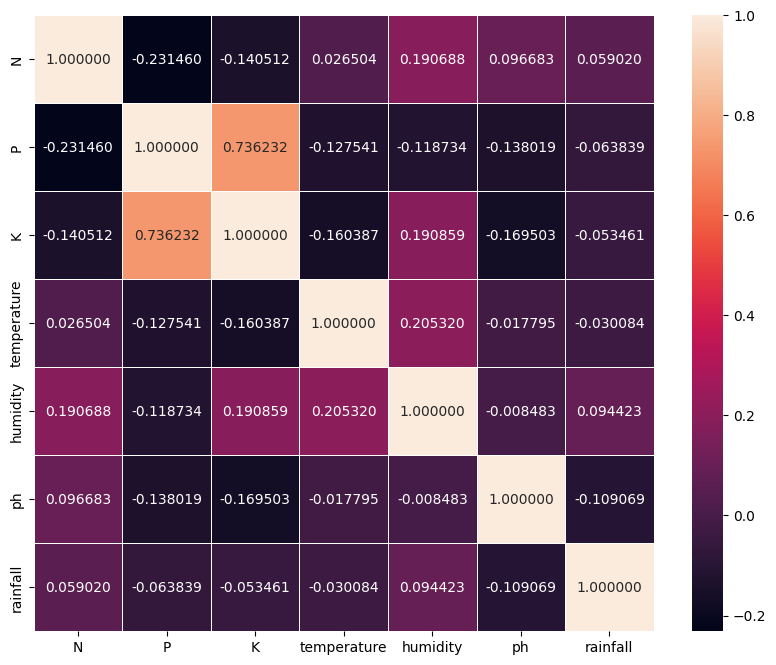

In [10]:
# Select only the numerical columns before calculating correlation.
numerical_df = df.select_dtypes(include=['number'])
correlation_mat = numerical_df.corr()
correlation_mat

plt.figure(figsize=(10,8))
sns.heatmap(correlation_mat, linewidths=.5,annot=True, fmt="f")

Handle Missing Values

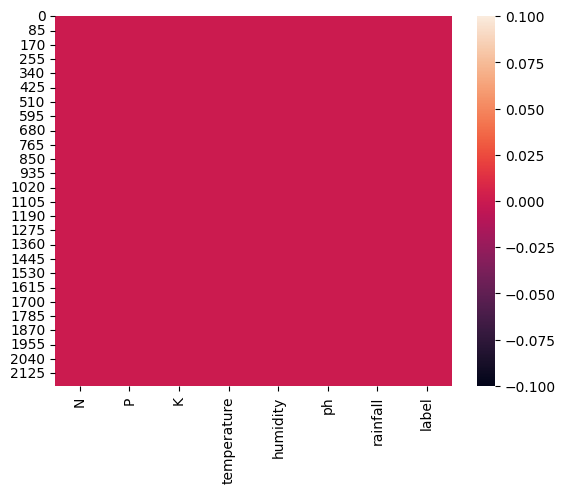

In [11]:
df.isnull().sum()
df = df.dropna()
sns.heatmap(df.isnull())
plt.show()

Exploratory Data Analysis (EDA)

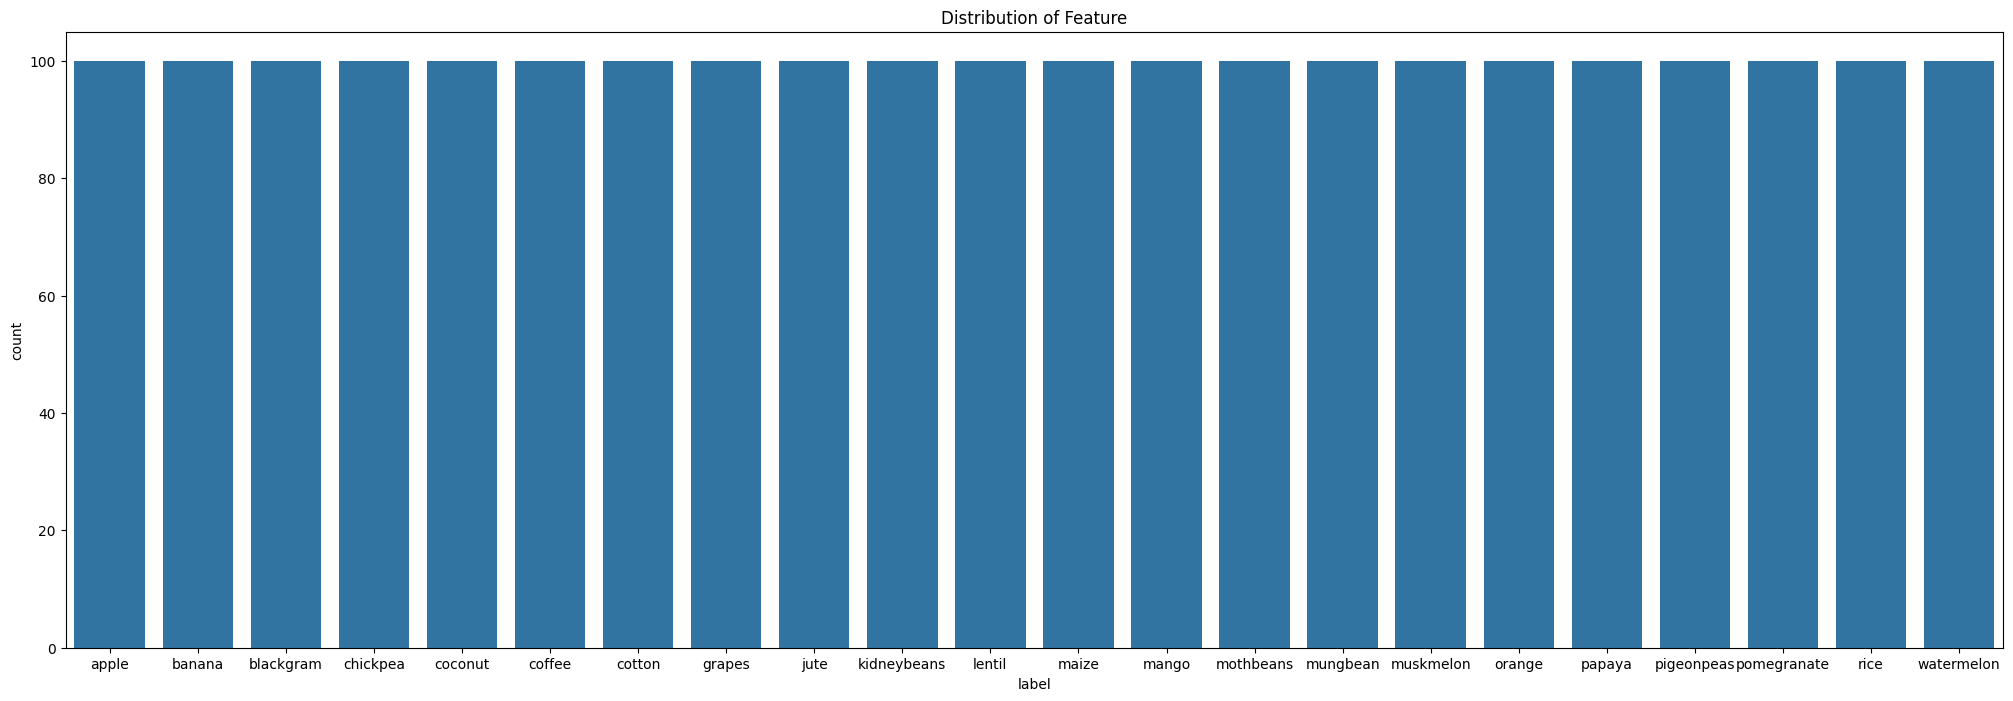

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,8))
df['label'] = df['label'].astype('category')
sns.countplot(x='label', data=df)
plt.title('Distribution of Feature')
plt.show()

Histogram Representation

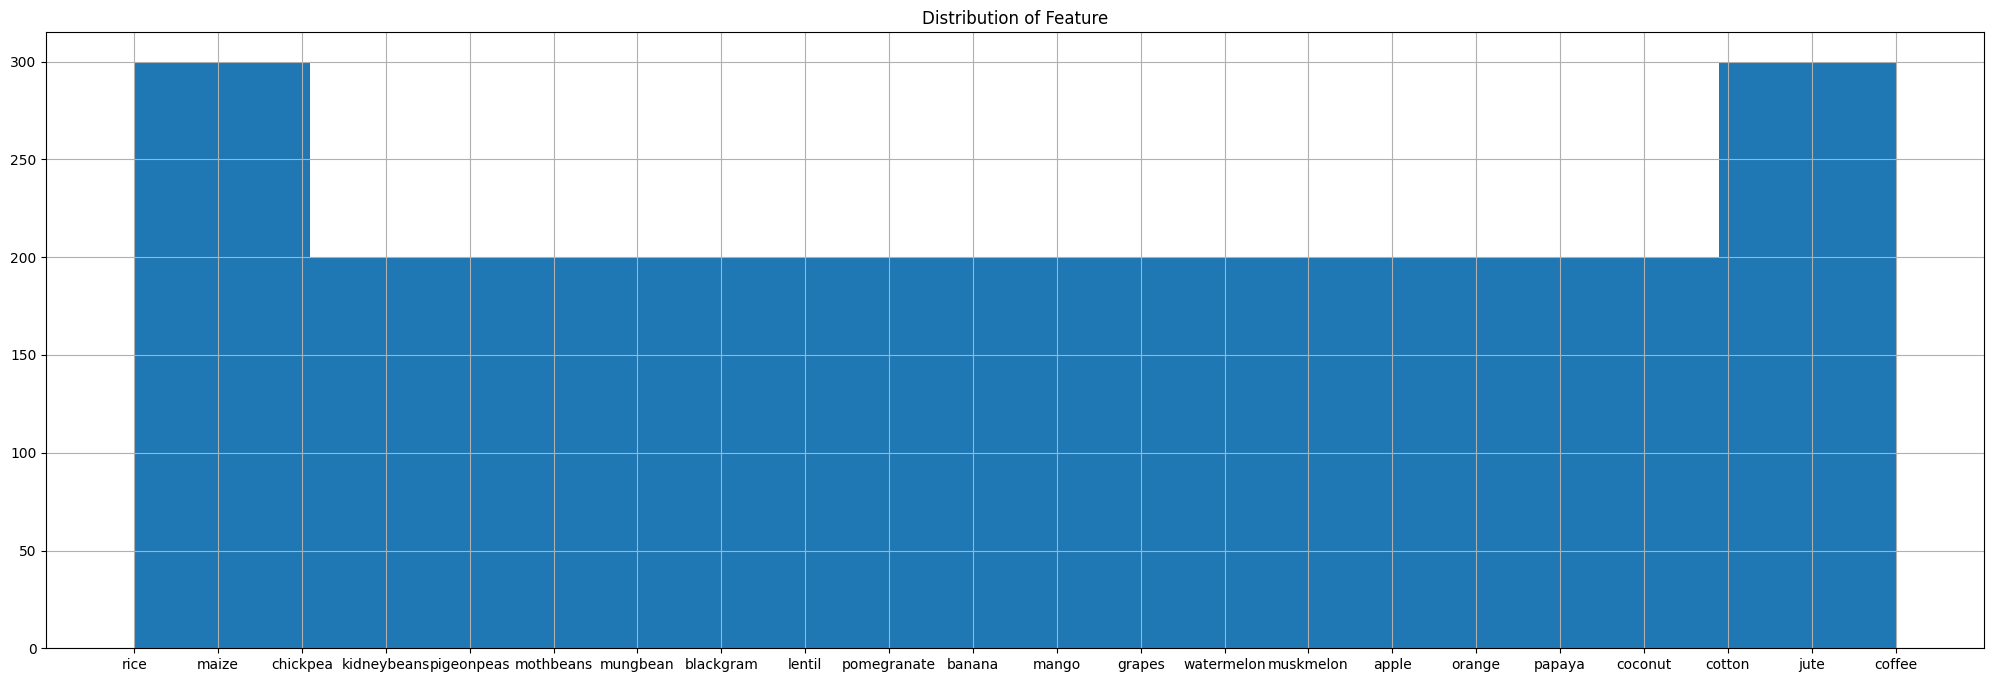

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,8))
df['label'].hist()
plt.title('Distribution of Feature')
plt.show()

In [14]:
df.shape

(2200, 8)

Dividing Into Train and Test

In [15]:
X = df.iloc[:,:-1]     # selecting all features except 'label' feature
y = df.iloc[:,-1]      # selecting 'label' feature as dependent feature

In [16]:
# Splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =2)

In [17]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1760, 7)
X_test shape: (440, 7)
y_train shape: (1760,)
y_test shape: (440,)


Building The Model

LogisticRegression F1 Score: 0.951575036413068
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

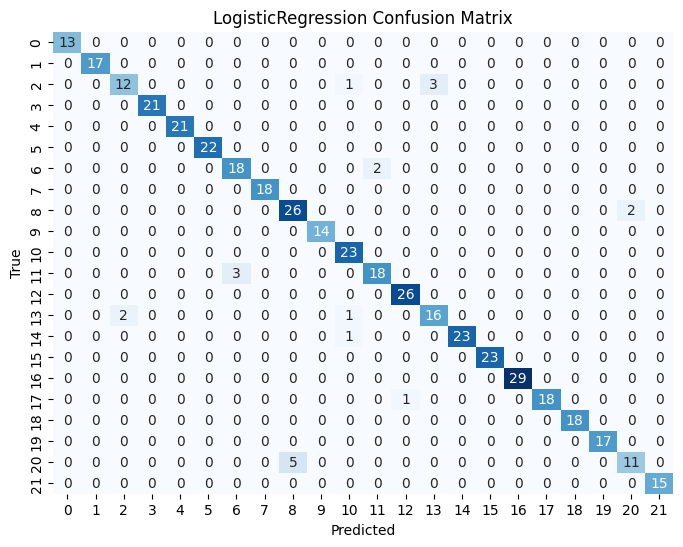



LogisticRegression model saved as logisticregression_model.pkl
Probabilistic LogisticRegression F1 Score: 0.707561969228882
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       0.68      0.88      0.77        17
   blackgram       0.60      0.38      0.46        16
    chickpea       0.00      0.00      0.00        21
     coconut       0.95      0.95      0.95        21
      coffee       0.92      1.00      0.96        22
      cotton       0.83      1.00      0.91        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.64      0.75        28
 kidneybeans       0.47      1.00      0.64        14
      lentil       0.62      1.00      0.77        23
       maize       0.89      0.81      0.85        21
       mango       1.00      0.23      0.38        26
   mothbeans       0.37      0.89      0.52        19
    mungbean       0.47      0.79      0.59        24
   muskme

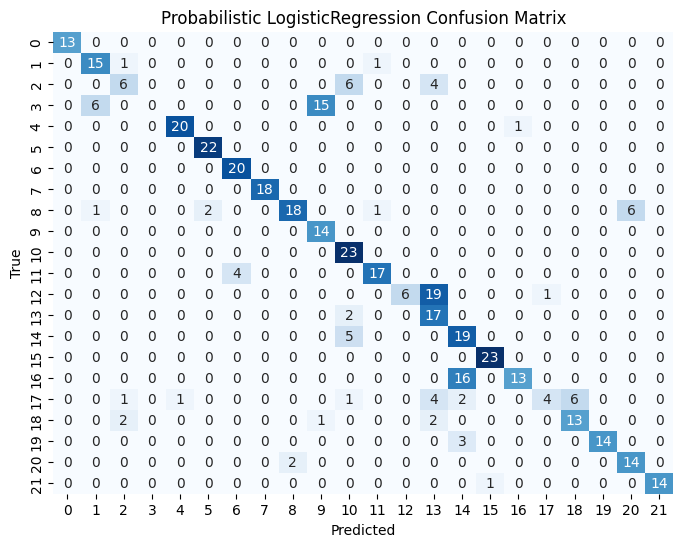



Probabilistic LogisticRegression model saved as probabilistic_logisticregression_model.pkl
DecisionTree F1 Score: 0.9726245138048658
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      0.94      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.95      0.91      0.93        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      0.95      0.92        19
    mungbean       1.00      1.00      1.00        24


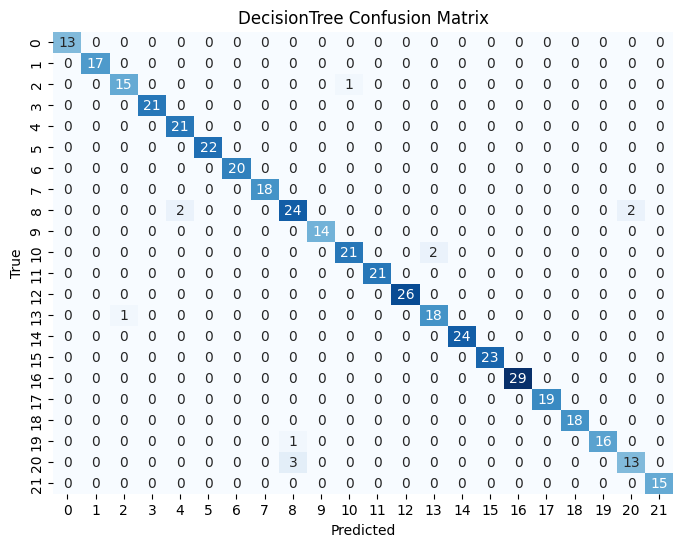



DecisionTree model saved as decisiontree_model.pkl
SVC F1 Score: 0.9381174547613329
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.88      0.94      0.91        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.87      1.00      0.93        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.64      0.73        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      0.96      0.92        23
       maize       1.00      0.86      0.92        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      0.92      0.96        24
   muskmelon       1.00      1.00      1.00      

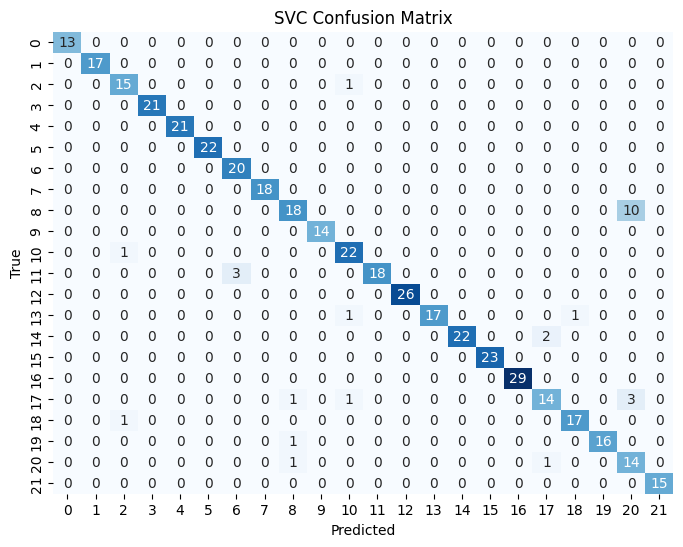



SVC model saved as svc_model.pkl
KNeighbors F1 Score: 0.9750354867384481
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      

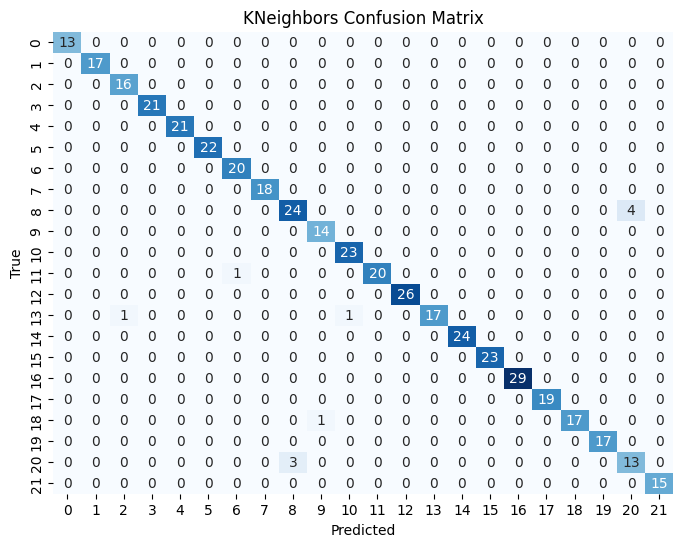



KNeighbors model saved as kneighbors_model.pkl
MultinomialNB F1 Score: 0.8921178597545297
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       0.85      1.00      0.92        17
   blackgram       0.52      0.69      0.59        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      0.95      0.98        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.95      0.90        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.96      0.90        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.68      0.74      0.71        23
       maize       0.95      0.86      0.90        21
       mango       0.96      0.85      0.90        26
   mothbeans       0.86      0.63      0.73        19
    mungbean       0.88      0.96      0.92        24
   muskmelon       1.00      1.00      1.00

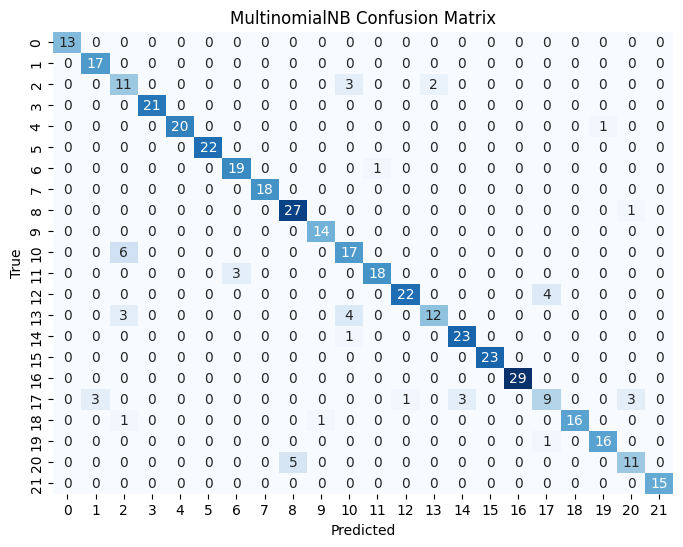



MultinomialNB model saved as multinomialnb_model.pkl
VotingClassifier F1 Score: 0.9812932900432899
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.96      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.90      0.95        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00 

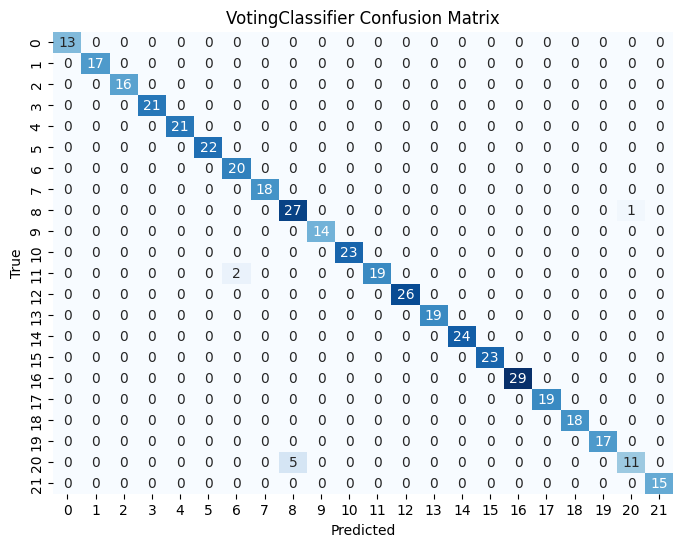



VotingClassifier model saved as votingclassifier_model.pkl
RandomForest F1 Score: 0.9953814002089865
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.0

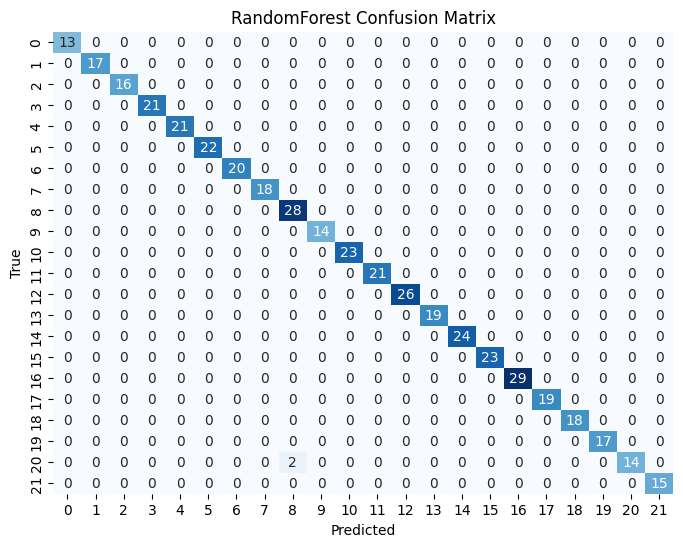



RandomForest model saved as randomforest_model.pkl
AdaBoost F1 Score: 0.046571895756223704
              precision    recall  f1-score   support

       apple       0.42      1.00      0.59        13
      banana       0.00      0.00      0.00        17
   blackgram       0.00      0.00      0.00        16
    chickpea       0.00      0.00      0.00        21
     coconut       0.00      0.00      0.00        21
      coffee       0.00      0.00      0.00        22
      cotton       0.00      0.00      0.00        20
      grapes       0.00      0.00      0.00        18
        jute       0.09      1.00      0.17        28
 kidneybeans       0.40      1.00      0.57        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       0.00      0.00      0.00        24
   muskmelon       0.00      0.00      0.0

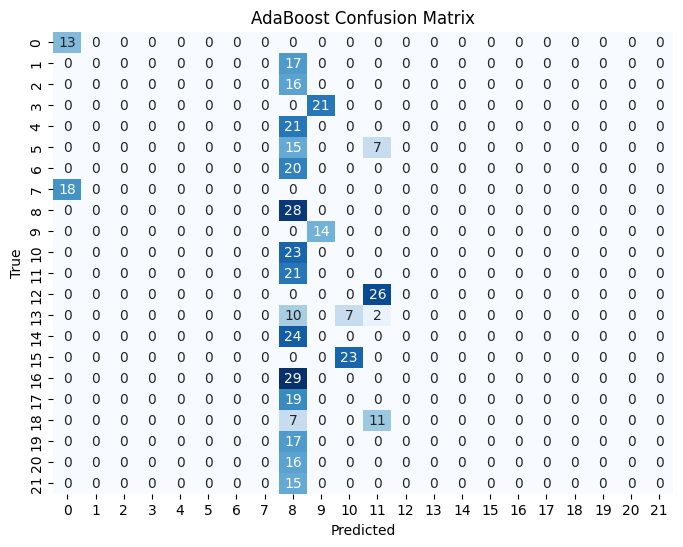



AdaBoost model saved as adaboost_model.pkl
GradientBoosting F1 Score: 0.9932352179411001
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.93      0.96        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.96      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.95      1.00      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00 

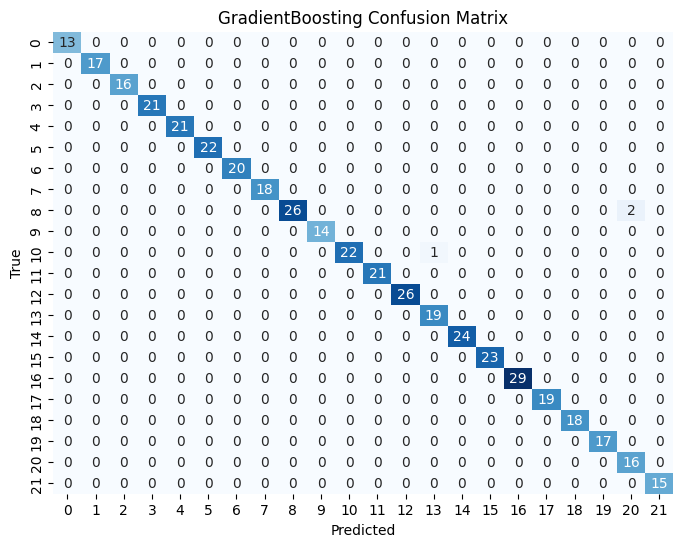



GradientBoosting model saved as gradientboosting_model.pkl
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000627 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.007161
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.042252
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.116360
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.066350
[LightGBM] [Info] Start training from score -3.196403
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[Lig

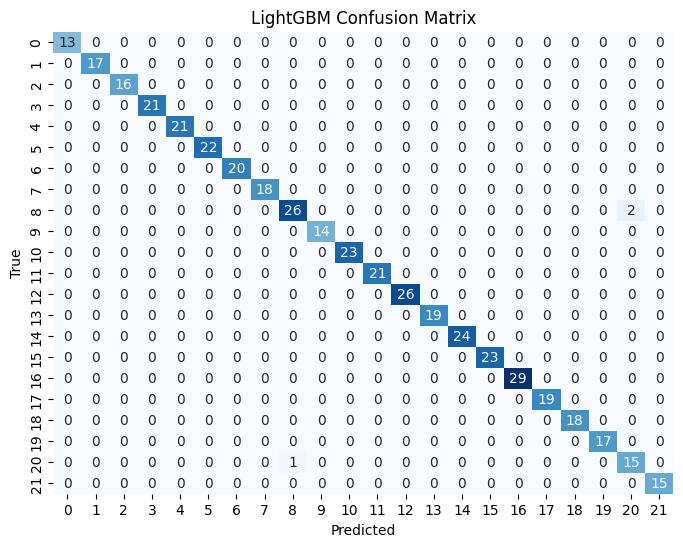



LightGBM model saved as lightgbm_model.pkl
XGBoost F1 Score: 0.9908361023142658
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23

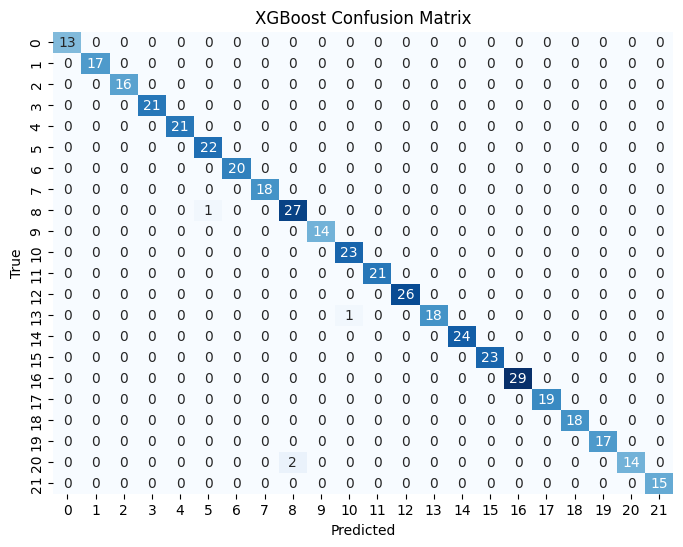



XGBoost model saved as xgboost_model.pkl


In [18]:
import joblib
# Create a dictionary to store models
models = {
    'LogisticRegression' : LogisticRegression(),
    'Probabilistic LogisticRegression' : CalibratedClassifierCV(LogisticRegression(),cv=5), # logistic regression with probabilistic interpretation
    'DecisionTree' : DecisionTreeClassifier(),
    'SVC': LinearSVC(random_state=1,C=0.05),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB(),
    'VotingClassifier' : VotingClassifier(estimators=[('LogisticRegression',LogisticRegression()),('DecisionTree',DecisionTreeClassifier()),('KNeighbors',KNeighborsClassifier(n_neighbors=5)),('MultinomialNB',MultinomialNB())],voting='soft'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost' : AdaBoostClassifier(n_estimators=100),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'LightGBM' : lgb.LGBMClassifier(n_estimators=100, random_state=42),
    'XGBoost' : XGBClassifier(n_estimators=100, random_state=42),
}

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform both training and testing labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train_encoded)  # Use encoded labels for training

    # Test the model
    predictions = model.predict(X_test)

    # Decode predictions for evaluation
    decoded_predictions = label_encoder.inverse_transform(predictions)

    # Calculate accuracy
    f1 = f1_score(y_test, decoded_predictions, average='weighted')  # Use original labels for evaluation
    print(f"{model_name} F1 Score: {f1}")

    # Print classification report
    print(classification_report(y_test, decoded_predictions))  # Use original labels for evaluation

    # Calculate confusion matrix
    cm = confusion_matrix(y_test,decoded_predictions)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    print("\n" + "="*40 + "\n")
    # Dump each model into separate files
    file_name = model_name.lower().replace(' ', '_') + '_model.pkl'
    with open(file_name, 'wb') as f:
        pickle.dump(model, f)
        print(f"{model_name} model saved as {file_name}")

In [19]:
def create_model(model):
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    print("Classification Report")
    print(classification_report(y_test, Y_pred))
    cm = confusion_matrix(y_test, Y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate and print accuracy score
    accuracy = accuracy_score(y_test, Y_pred)
    print("Accuracy Score:", accuracy)

    return model

Bootstrapping
1. Bagging

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.92      0.69      0.79        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.90      0.90      0.90        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.82      1.00      0.90        23
       maize       0.90      0.90      0.90        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.80      0.84      0.82        19
    mungbean       1.00      0.92      0.96        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
     

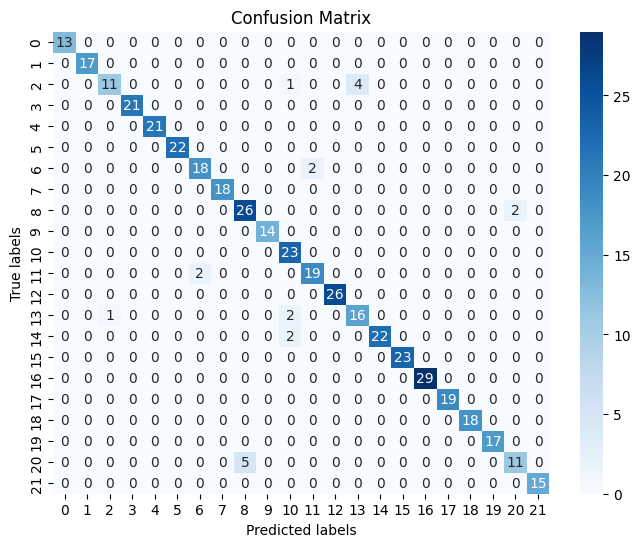

Accuracy Score: 0.9522727272727273


In [20]:
from sklearn.ensemble import BaggingClassifier
# Bagging for LogisticRegression
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=1500,random_state=1)
bc=create_model(bc)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       0.68      0.88      0.77        17
   blackgram       0.56      0.31      0.40        16
    chickpea       0.00      0.00      0.00        21
     coconut       0.95      0.95      0.95        21
      coffee       0.92      1.00      0.96        22
      cotton       0.83      1.00      0.91        20
      grapes       1.00      1.00      1.00        18
        jute       0.91      0.36      0.51        28
 kidneybeans       0.45      1.00      0.62        14
      lentil       0.61      1.00      0.75        23
       maize       0.77      0.81      0.79        21
       mango       1.00      0.35      0.51        26
   mothbeans       0.39      0.84      0.53        19
    mungbean       0.51      0.83      0.63        24
   muskmelon       0.92      1.00      0.96        23
      orange       0.93      0.45      0.60        29
     

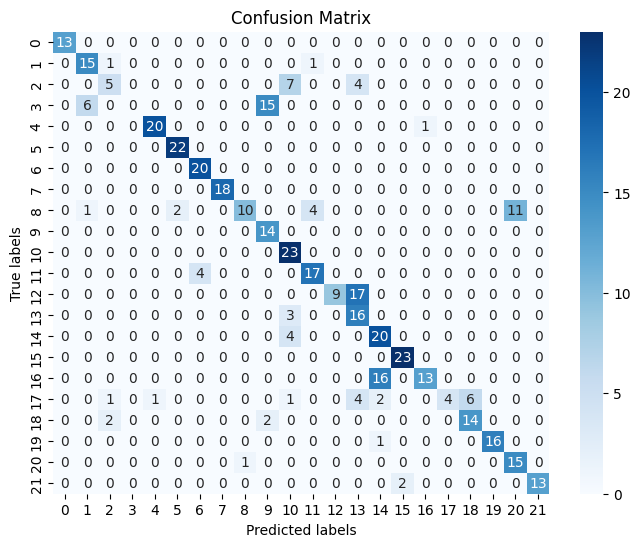

Accuracy Score: 0.7272727272727273


In [21]:
# Bagging for ProbabilisticLR
bc1=BaggingClassifier(CalibratedClassifierCV(LogisticRegression(),cv=5),n_estimators=10,max_samples=1500,random_state=1)
bc1=create_model(bc1)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
     

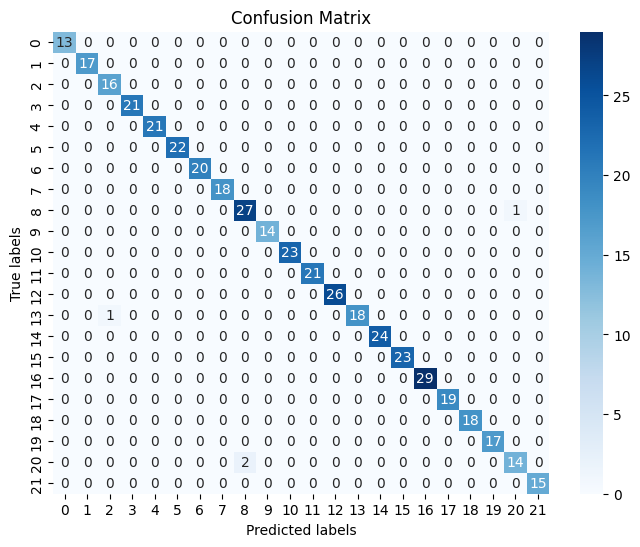

Accuracy Score: 0.990909090909091


In [22]:
#Bagging for DecisionTreeClassifier
bc2=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=1500,random_state=1)
bc2=create_model(bc2)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.76      0.81      0.79        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.95      0.90        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.68      0.75        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.85      0.96      0.90        23
       maize       0.95      0.86      0.90        21
       mango       1.00      0.96      0.98        26
   mothbeans       0.94      0.79      0.86        19
    mungbean       1.00      0.92      0.96        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
     

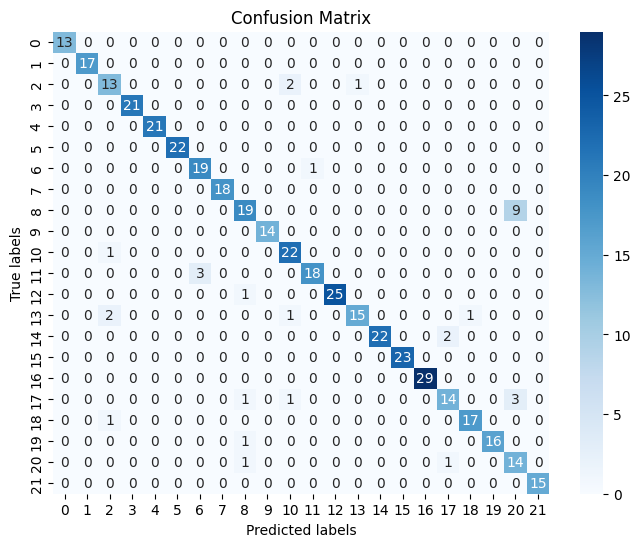

Accuracy Score: 0.925


In [23]:
#Bagging for LinearSVC
bc3=BaggingClassifier(LinearSVC(random_state=1,C=0.05),n_estimators=10,max_samples=1500,random_state=1)
bc3=create_model(bc3)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
     

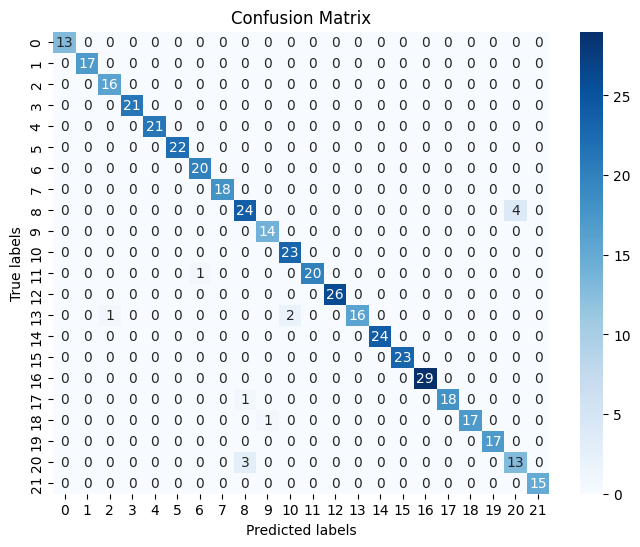

Accuracy Score: 0.9704545454545455


In [24]:
# Bagging for KNeighbors
bc4=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=10,max_samples=1500,random_state=1)
bc4=create_model(bc4)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       0.85      1.00      0.92        17
   blackgram       0.52      0.69      0.59        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      0.95      0.98        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.95      0.90        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.96      0.90        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.68      0.74      0.71        23
       maize       0.95      0.86      0.90        21
       mango       0.96      0.85      0.90        26
   mothbeans       0.86      0.63      0.73        19
    mungbean       0.88      0.96      0.92        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
     

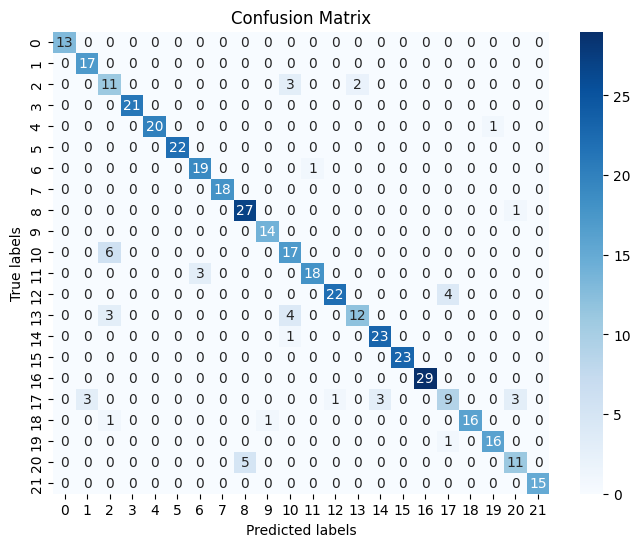

Accuracy Score: 0.8931818181818182


In [25]:
# Bagging for MultinomialNB
bc5=BaggingClassifier(MultinomialNB(),n_estimators=10,max_samples=1500,random_state=1)
bc5=create_model(bc5)

Bootstraping
 2. Pasting

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
     

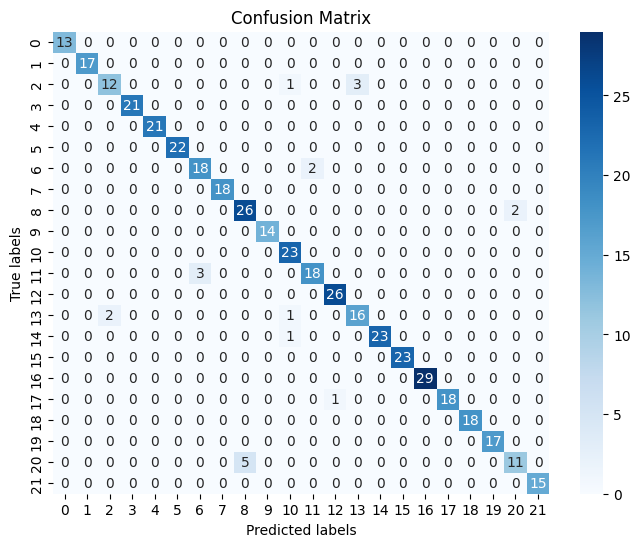

Accuracy Score: 0.9522727272727273


In [26]:
# Pasting for LogisticRegression
pc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=1500,random_state=1,bootstrap=False)
pc=create_model(pc)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       0.68      0.88      0.77        17
   blackgram       0.60      0.38      0.46        16
    chickpea       0.00      0.00      0.00        21
     coconut       0.95      0.95      0.95        21
      coffee       0.92      1.00      0.96        22
      cotton       0.80      1.00      0.89        20
      grapes       1.00      1.00      1.00        18
        jute       0.95      0.68      0.79        28
 kidneybeans       0.47      1.00      0.64        14
      lentil       0.62      1.00      0.77        23
       maize       0.94      0.76      0.84        21
       mango       1.00      0.23      0.38        26
   mothbeans       0.37      0.89      0.52        19
    mungbean       0.50      0.79      0.61        24
   muskmelon       0.96      1.00      0.98        23
      orange       0.93      0.45      0.60        29
     

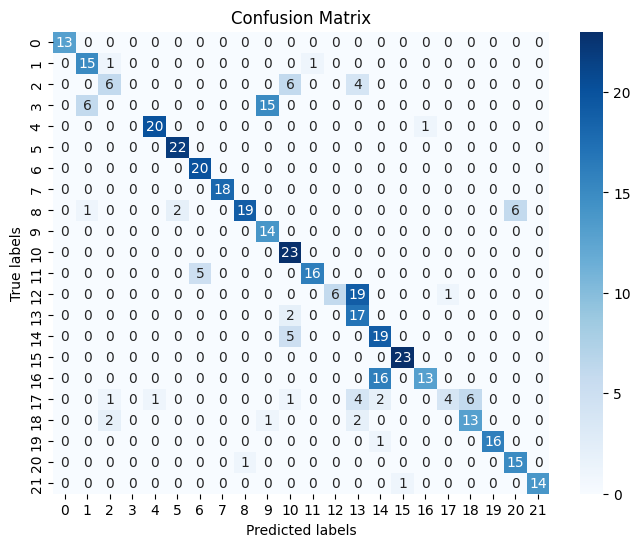

Accuracy Score: 0.740909090909091


In [27]:
# Pasting for ProbabilisticLR
pc1=BaggingClassifier(CalibratedClassifierCV(LogisticRegression(),cv=5),n_estimators=10,max_samples=1500,random_state=1,bootstrap=False)
pc1=create_model(pc1)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      0.94      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.96      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.91      0.95        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.86      0.95      0.90        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
     

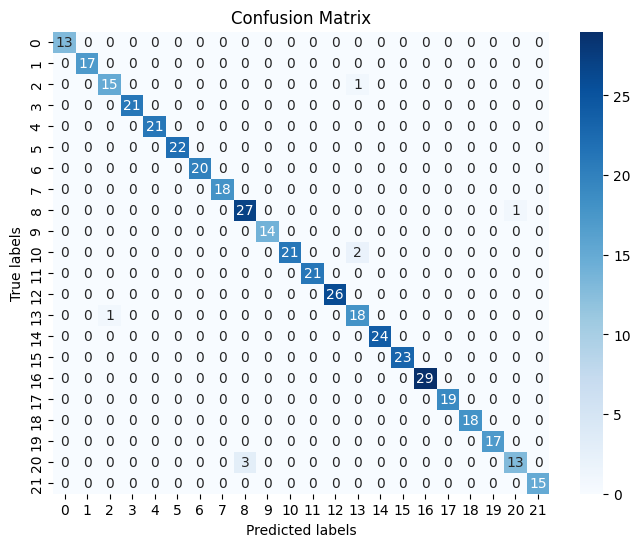

Accuracy Score: 0.9818181818181818


In [28]:
# Pasting for DecisionTreeClassifier
pc2=BaggingClassifier(DecisionTreeClassifier(),n_estimators=10,max_samples=1500,random_state=1,bootstrap=False)
pc2=create_model(pc2)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.79      0.94      0.86        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.87      1.00      0.93        20
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.71      0.78        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      0.96      0.92        23
       maize       1.00      0.86      0.92        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       1.00      0.92      0.96        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
     

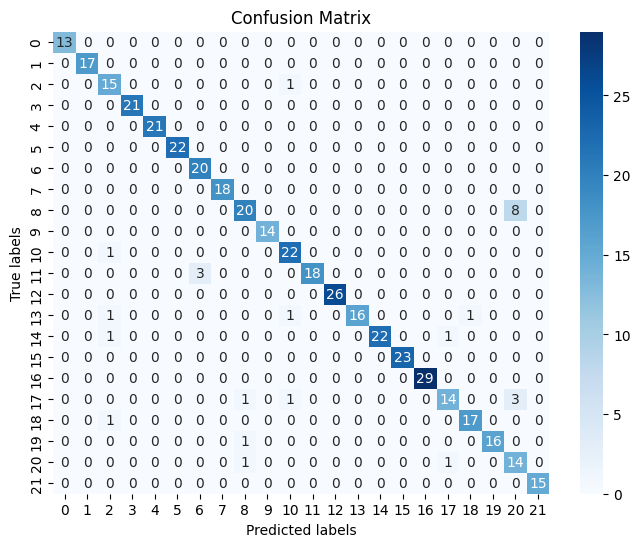

Accuracy Score: 0.9386363636363636


In [29]:
# Pasting for LinearSVC
pc3=BaggingClassifier(LinearSVC(random_state=1,C=0.05),n_estimators=10,max_samples=1500,random_state=1,bootstrap=False)
pc3=create_model(pc3)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.89      0.89        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
     

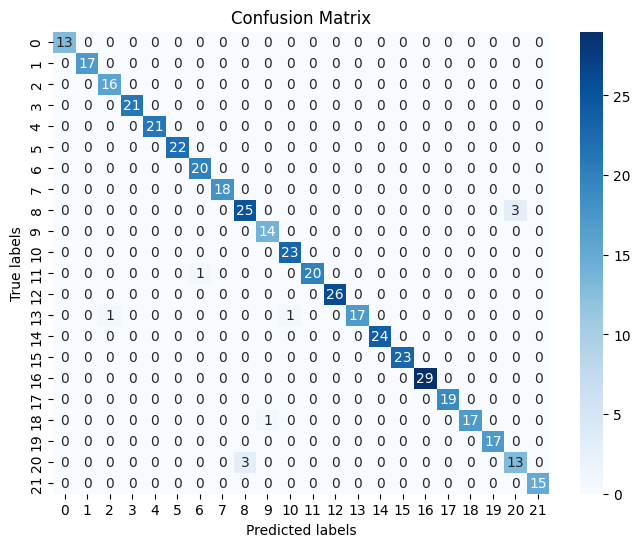

Accuracy Score: 0.9772727272727273


In [30]:
# Pasting for KNeighbors
pc4=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=10,max_samples=1500,random_state=1,bootstrap=False)
pc4=create_model(pc4)

Classification Report
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       0.85      1.00      0.92        17
   blackgram       0.50      0.69      0.58        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      0.95      0.98        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.95      0.90        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.96      0.90        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.68      0.74      0.71        23
       maize       0.95      0.86      0.90        21
       mango       0.96      0.85      0.90        26
   mothbeans       0.85      0.58      0.69        19
    mungbean       0.88      0.96      0.92        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
     

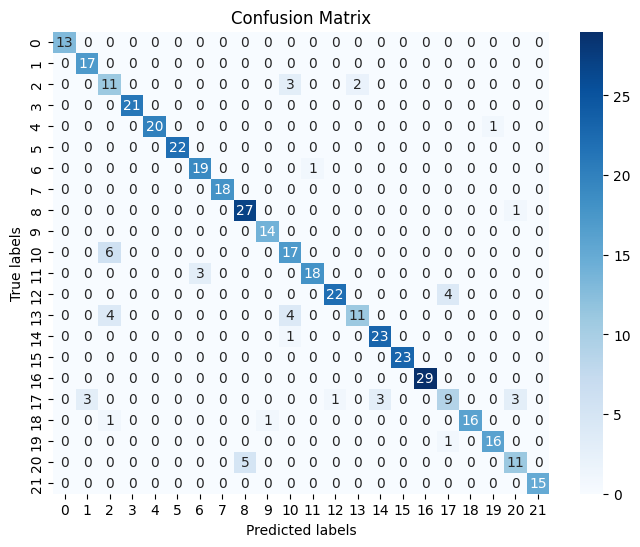

Accuracy Score: 0.8909090909090909


In [31]:
# Pasting for MultinomialNB
pc5=BaggingClassifier(MultinomialNB(),n_estimators=10,max_samples=1500,random_state=1,bootstrap=False)
pc5=create_model(pc5)

Stacking

LogisticRegression: 0.951575036413068
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

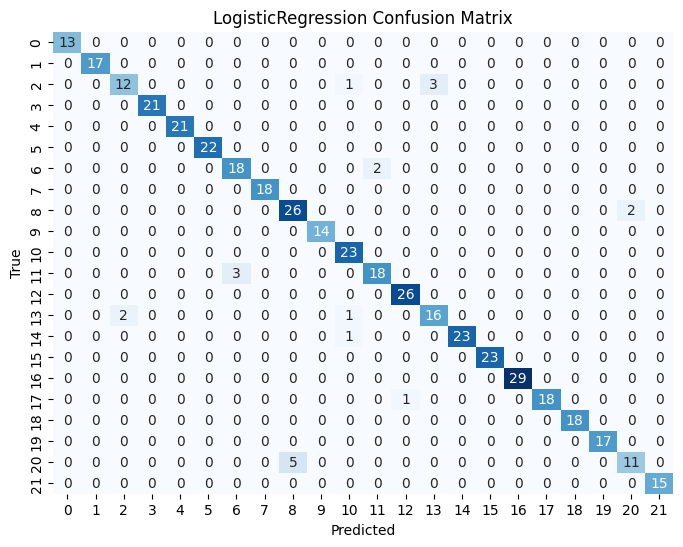



CalibratedClassifierCV: 0.707561969228882
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       0.68      0.88      0.77        17
   blackgram       0.60      0.38      0.46        16
    chickpea       0.00      0.00      0.00        21
     coconut       0.95      0.95      0.95        21
      coffee       0.92      1.00      0.96        22
      cotton       0.83      1.00      0.91        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.64      0.75        28
 kidneybeans       0.47      1.00      0.64        14
      lentil       0.62      1.00      0.77        23
       maize       0.89      0.81      0.85        21
       mango       1.00      0.23      0.38        26
   mothbeans       0.37      0.89      0.52        19
    mungbean       0.47      0.79      0.59        24
   muskmelon       0.96      1.00      0.98        23
      orange       0.93      0.45    

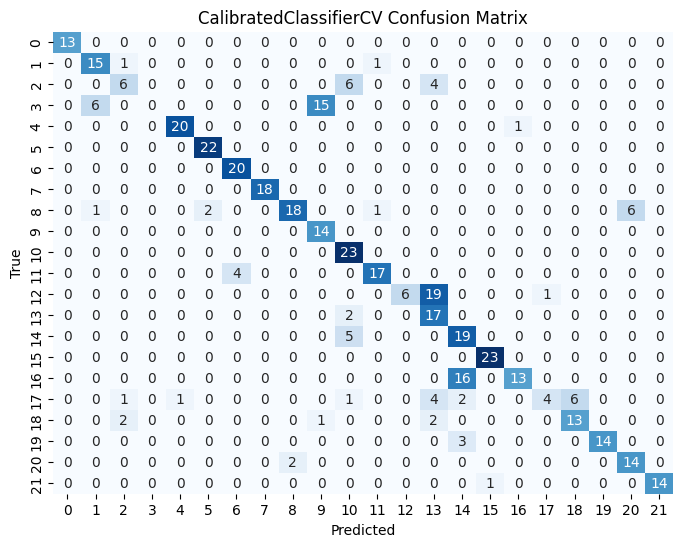



DecisionTreeClassifier: 0.9839631606637876
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.96      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.91      0.95        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      0.95      0.92        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00   

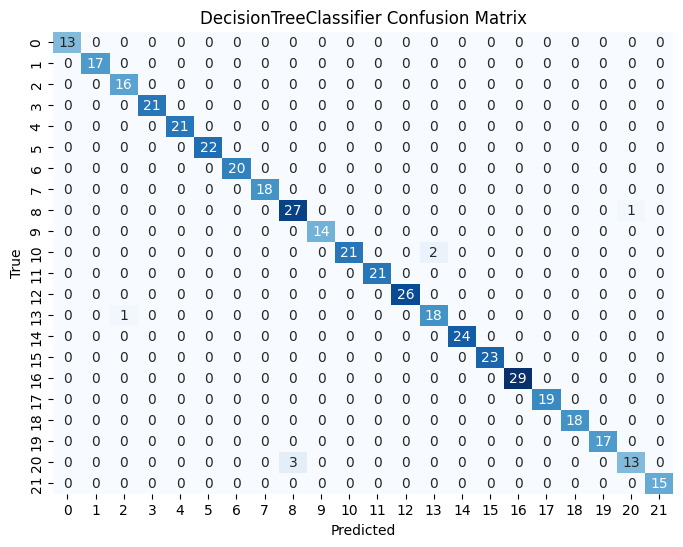



LinearSVC: 0.9381174547613329
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.88      0.94      0.91        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.87      1.00      0.93        20
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.64      0.73        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      0.96      0.92        23
       maize       1.00      0.86      0.92        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      0.92      0.96        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00      

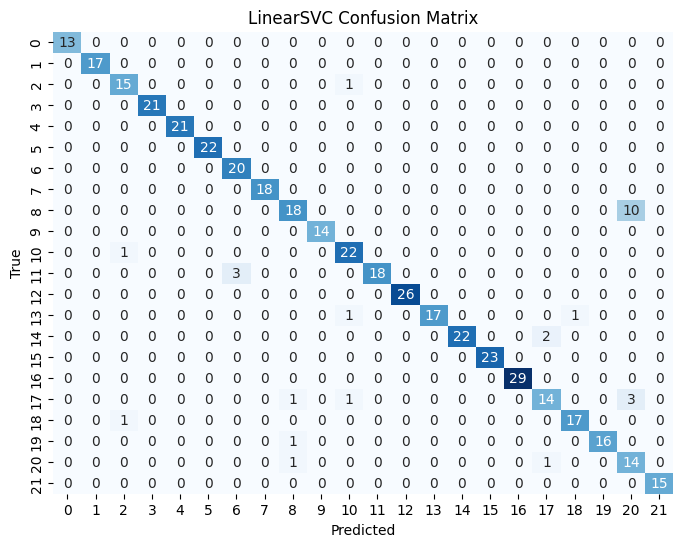



KNeighborsClassifier: 0.9750354867384481
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.86      0.87        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00     

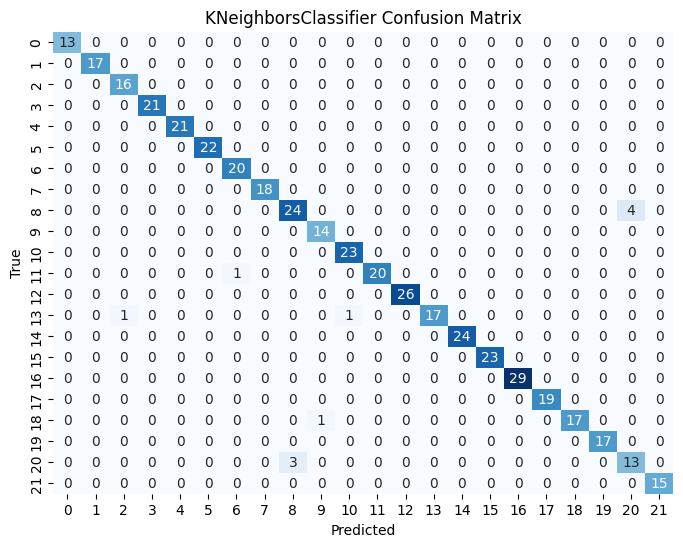

In [32]:
from mlxtend.classifier import StackingClassifier
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform both training and testing labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

LR=LogisticRegression()
ProbabilisticLR = CalibratedClassifierCV(LogisticRegression(),cv=5)
DT=DecisionTreeClassifier()
SVC = LinearSVC(random_state=1,C=0.05)
KNeighbors = KNeighborsClassifier(n_neighbors=5)
model_list=[LR,ProbabilisticLR,DT,SVC,KNeighbors]
for model in model_list:
    # Train the model
    model.fit(X_train, y_train_encoded)  # Use encoded labels for training

    # Test the model
    predictions = model.predict(X_test)

    # Decode predictions for evaluation
    decoded_predictions = label_encoder.inverse_transform(predictions)

    # Calculate accuracy
    f1 = f1_score(y_test, decoded_predictions, average='weighted')  # Use original labels for evaluation
    print(type(model).__name__+":",f1)

    # Print classification report
    print(classification_report(y_test, decoded_predictions))  # Use original labels for evaluation

    # Calculate confusion matrix
    cm = confusion_matrix(y_test,decoded_predictions)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(type(model).__name__+' Confusion Matrix')
    plt.show()

    print("\n" + "="*40 + "\n")


Error analysis

In [33]:
rice_df = df[df["label"] == 'rice']
jute_df = df[df["label"] == 'jute']
df_rice_jute = pd.concat([rice_df, jute_df])

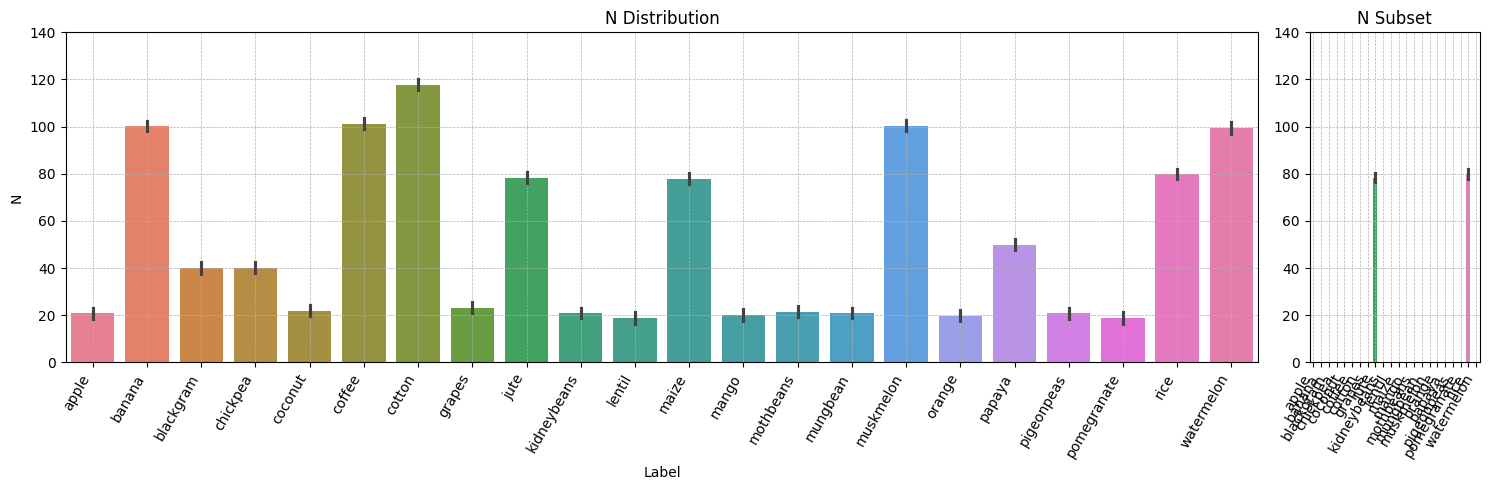

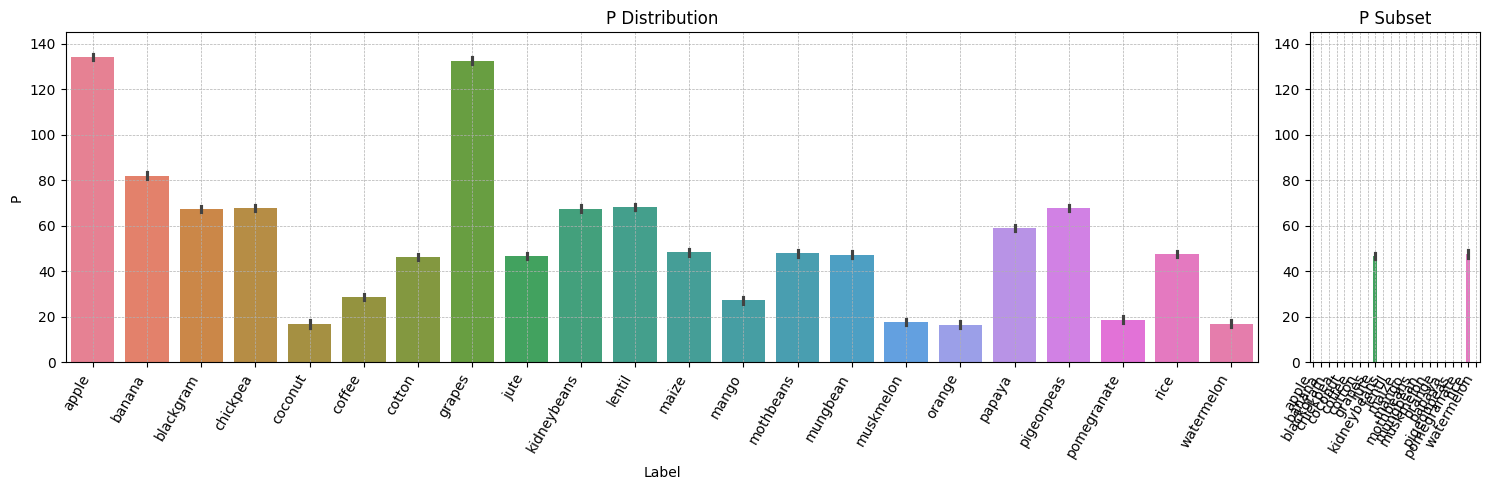

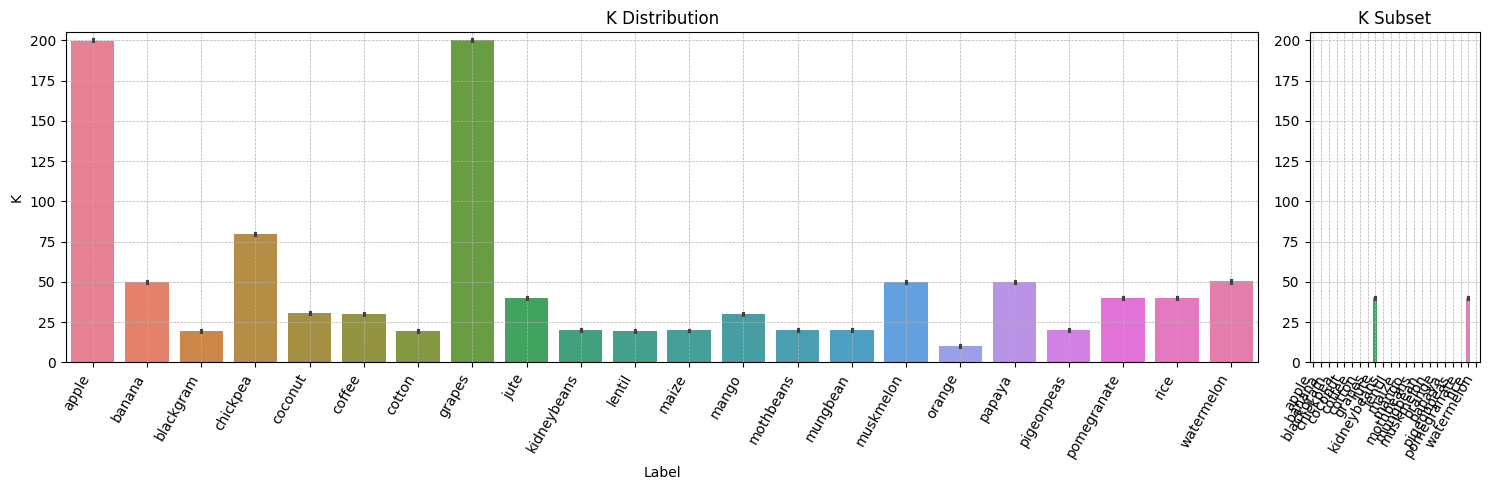

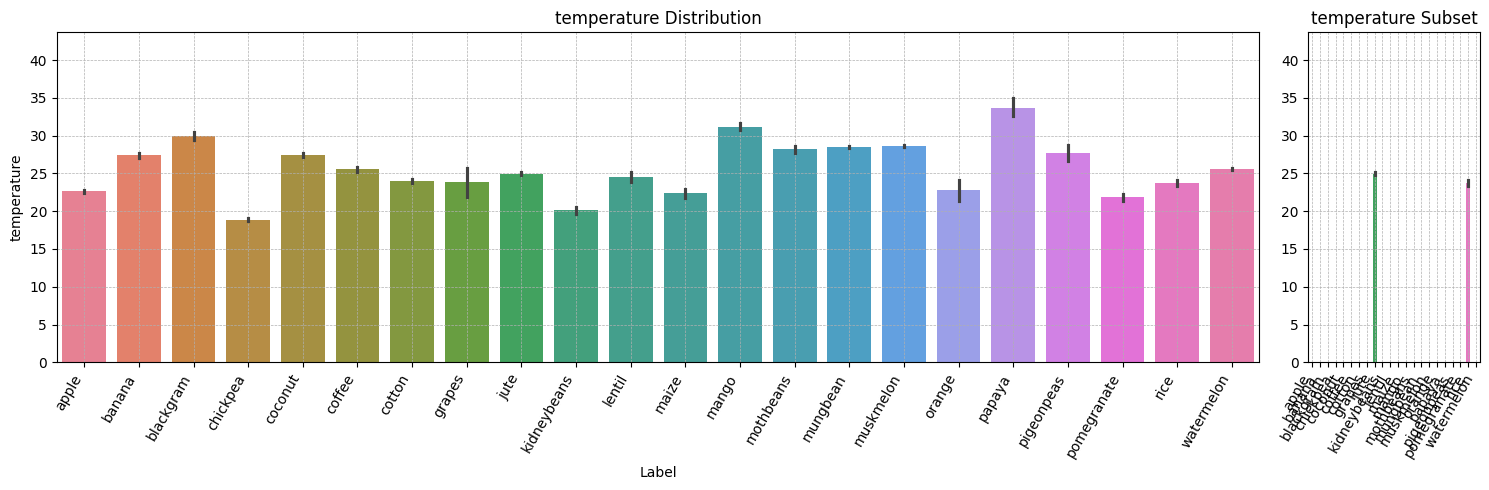

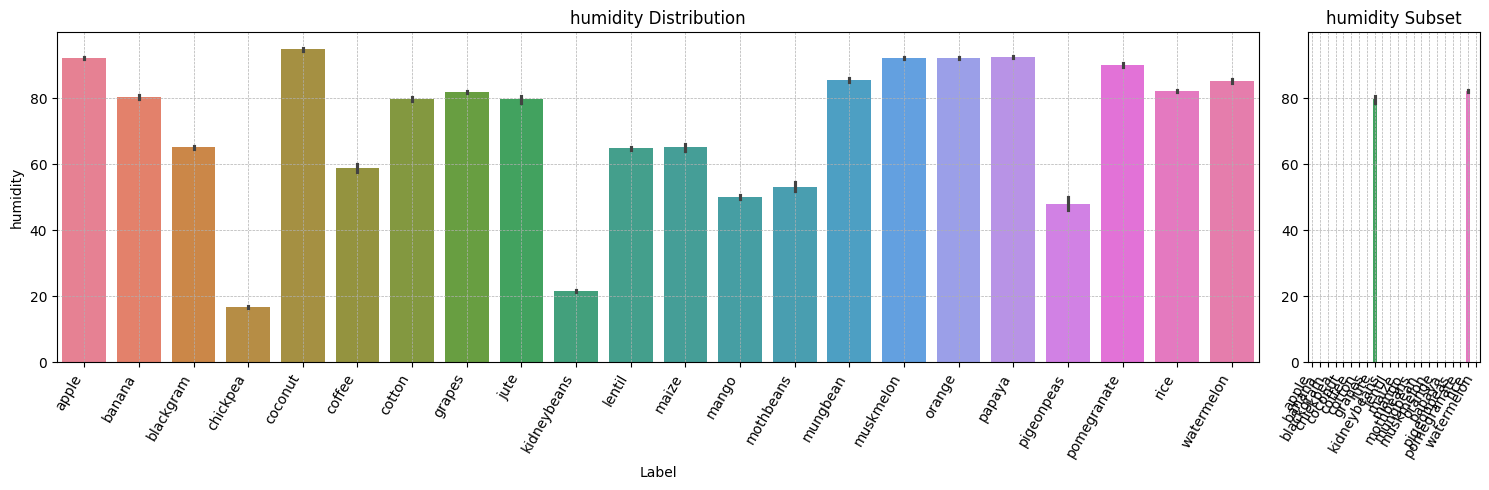

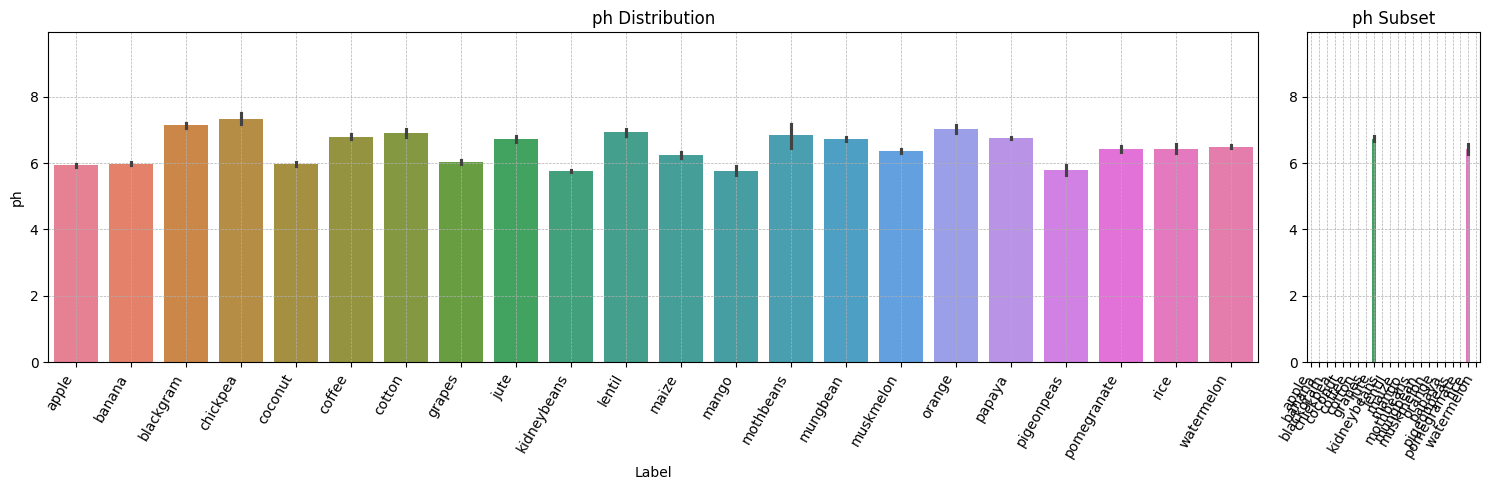

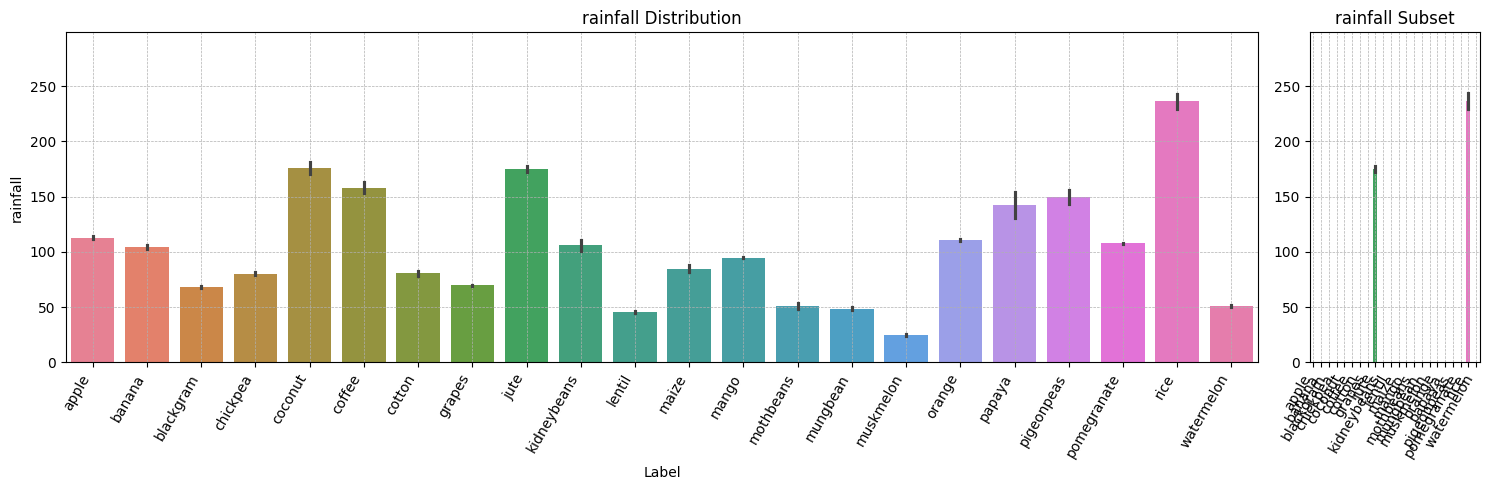

In [34]:
# Function to change the width of bars in a plot
def change_width(ax, new_value):
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_value
        # Change the bar width
        patch.set_width(new_value)
        # Recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

# Define a consistent color palette
palette = sns.color_palette("husl", len(df['label'].unique()))

# Plot each column in the dataframe
for col in df.columns[:-1]:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [3.5, 0.5]})

    # Plot the main dataframe
    sns.barplot(x='label', y=col, data=df, ax=ax[0], palette=palette)
    ax[0].set_title(f'{col} Distribution')
    ax[0].set_ylabel(col)
    ax[0].set_xlabel('Label')
    ax[0].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Plot the subset dataframe
    sns.barplot(x='label', y=col, data=df_rice_jute, ax=ax[1], palette=palette)
    change_width(ax[1], 0.5)
    ax[1].set_title(f'{col} Subset')
    ax[1].set_ylabel('')
    ax[1].set_xlabel('')
    ax[1].grid(True, which='both', linestyle='--', linewidth=0.5)

    # Set consistent y-axis limits
    max_val = max(df[col].max(), df_rice_jute[col].max())
    ax[0].set_ylim(0, max_val)
    ax[1].set_ylim(0, max_val)

    # Improve x-axis label formatting
    fig.autofmt_xdate(rotation=60)

    plt.tight_layout()
    plt.show()

Model pickling

In [35]:
# Load pre-trained models
loaded_models = {}
model_files = {
    'LogisticRegression': 'logisticregression_model.pkl',
    'Probabilistic LogisticRegression': 'probabilistic_logisticregression_model.pkl',
    'DecisionTree': 'decisiontree_model.pkl',
    'SVC': 'svc_model.pkl',
    'KNeighbors': 'kneighbors_model.pkl',
    'MultinomialNB': 'multinomialnb_model.pkl',
    'VotingClassifier': 'votingclassifier_model.pkl',
    'RandomForest': 'randomforest_model.pkl',
    'AdaBoost': 'adaboost_model.pkl',
    'GradientBoosting': 'gradientboosting_model.pkl',
    'LightGBM': 'lightgbm_model.pkl',
    'XGBoost': 'xgboost_model.pkl',
}

for model_name, file_name in model_files.items():
    try:
        with open(file_name, 'rb') as f:
            model = pickle.load(f)
            loaded_models[model_name] = model
            print(f"Loaded {model_name} model successfully")
    except Exception as e:
        print(f"Error loading {model_name} model: {e}")

def predict_labels(sodium, potassium, phosphorus, temperature, humidity, ph, rainfall):
    # Collect user inputs into a numpy array
    user_input = np.array([[sodium, potassium, phosphorus, temperature, humidity, ph, rainfall]])

    # Make predictions using the loaded models
    predictions = {}
    for model_name, model in loaded_models.items():
        try:
            encoded_label = model.predict(user_input)[0]
            decoded_label = label_encoder.inverse_transform([encoded_label])[0]
            predictions[model_name] = decoded_label
        except Exception as e:
            print(f"Error predicting labels using {model_name}: {e}")
            predictions[model_name] = "Error"

    return predictions

# Example usage:
# Collecting user inputs
sodium = float(input("Enter sodium level: "))
potassium = float(input("Enter potassium level: "))
phosphorus = float(input("Enter phosphorus level: "))
temperature = float(input("Enter temperature in °C: "))
humidity = float(input("Enter humidity in %: "))
ph = float(input("Enter pH level: "))
rainfall = float(input("Enter rainfall: "))

# Predicting and displaying the labels from different models
predicted_labels = predict_labels(sodium, potassium, phosphorus, temperature, humidity, ph, rainfall)
for model_name, label in predicted_labels.items():
    print(f"{model_name} predicted label: {label}")

Loaded LogisticRegression model successfully
Loaded Probabilistic LogisticRegression model successfully
Loaded DecisionTree model successfully
Loaded SVC model successfully
Loaded KNeighbors model successfully
Loaded MultinomialNB model successfully
Loaded VotingClassifier model successfully
Loaded RandomForest model successfully
Loaded AdaBoost model successfully
Loaded GradientBoosting model successfully
Loaded LightGBM model successfully
Loaded XGBoost model successfully
Enter sodium level: 8
Enter potassium level: 12
Enter phosphorus level: 23
Enter temperature in °C: 36
Enter humidity in %: 34
Enter pH level: 9
Enter rainfall: 100
LogisticRegression predicted label: mango
Probabilistic LogisticRegression predicted label: mothbeans
DecisionTree predicted label: mango
SVC predicted label: mango
KNeighbors predicted label: mango
MultinomialNB predicted label: mango
VotingClassifier predicted label: mango
RandomForest predicted label: mango
AdaBoost predicted label: maize
GradientBoos